<a href="https://colab.research.google.com/github/Alena-Mishchenko/Homework_5/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [86]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [87]:
def hypothesis(X, theta):
    return np.dot(X, theta)
# def hypothesis(X, weights, bias):
#     return np.dot(X, weights) + bias


In [88]:
def compute_cost(X, y, theta):
    n_samples = X.shape[0]
    y_predicted = hypothesis(X, theta)
    difference = y_predicted - y
    cost = (1 / (2 * n_samples)) * np.sum(difference ** 2)
    return cost

# def compute_cost(X, y, weights, bias):
#     # m = len(y)
#     n_samples = X.shape[0]
#     y_predicted = hypothesis(X, weights, bias)
#     difference = y_predicted - y
#     cost = (1 / (2 * n_samples)) * np.sum(difference ** 2)
#     return cost



In [89]:
def gradient_descent_step(X, y, theta, learning_rate):
    n_samples = X.shape[0]
    y_predicted = hypothesis(X, theta)
    difference = y_predicted - y

    # compute gradients
    dtheta = (1 / n_samples) * np.dot(X.T, difference)

    # update parameters
    theta -= learning_rate * dtheta
    return theta

# def gradient_descent_step(X, y, weights, bias, learning_rate):
#     n_samples = X.shape[0]
#     costs = []
#     y_predicted = hypothesis(X, weights, bias)
#     difference = y_predicted - y
#    # compute gradients
#     dw = (1 / n_samples) * np.dot(X.T, difference)
#     db = (1 / n_samples) * np.sum(difference)
#    # update parameters
#     weights -= learning_rate * dw
#     bias -= learning_rate * db
#     return weights, bias


In [90]:
def gradient_descent(X, y, theta, learning_rate, n_iters):
    costs = []
    for i in range(n_iters):
        theta = gradient_descent_step(X, y, theta, learning_rate)
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

# def gradient_descent(X, y, weights, bias, learning_rate, n_iters):
#     costs = []
#     for i in range(n_iters):
#         weights, bias = gradient_descent_step(X, y, weights, bias, learning_rate)
#         cost = compute_cost(X, y, weights, bias)
#         costs.append(cost)

#     return weights, bias, costs


In [91]:

X = df[['area', 'bedrooms', 'bathrooms']].values
y = df['price'].values.reshape(-1, 1)
n_samples, n_features = X.shape
# weights = np.zeros(n_features)
# bias = 0
learning_rate = 0.01
n_iters = 500
y = y.reshape(y.shape[0])

ones = np.ones((X.shape[0], 1))
X_b = np.hstack((ones, X))
theta = np.zeros((n_features + 1, 1))

print(f"X     --> shape: {X.shape}")
print(f"y     --> shape: {y.shape}")
# print(f"THETA --> shape: {weights.shape}")
print(f"THETA --> shape: {theta.shape}")

normalized_df = df.copy(deep=True)
normalized_df.area = (df.area - df.area.mean()) / df.area.std()
normalized_df.price = (df.price - df.price.mean()) / df.price.std()
normalized_df.bedrooms = (df.bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
normalized_df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()



X     --> shape: (545, 3)
y     --> shape: (545,)
THETA --> shape: (4, 1)


X     --> shape: (545, 3)
y     --> shape: (545, 1)
THETA --> shape: (4, 1)
Оновлені параметри :
[[2.80550303e-16]
 [4.37267583e-01]
 [1.64993836e-01]
 [3.69079904e-01]]
Значення функції втрат (останнє):
0.2560000121424934


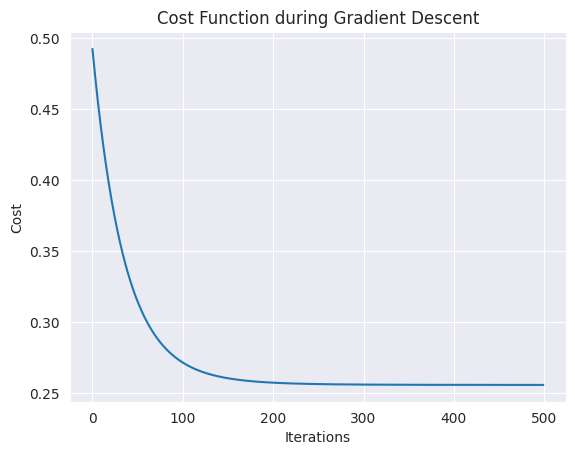

In [92]:

normalized_df = df.copy(deep=True)
normalized_df['area'] = (df['area'] - df['area'].mean()) / df['area'].std()
normalized_df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()
normalized_df['bedrooms'] = (df['bedrooms'] - df['bedrooms'].mean()) / df['bedrooms'].std()
normalized_df['bathrooms'] = (df['bathrooms'] - df['bathrooms'].mean()) / df['bathrooms'].std()

X_train = np.array(normalized_df[['area', 'bedrooms', 'bathrooms']])
y_train = np.array(normalized_df['price']).reshape(-1, 1)

ones = np.ones((X_train.shape[0], 1))
X_b = np.hstack((ones, X_train))

n_samples, n_features = X_train.shape
# weights = np.zeros((n_features, 1))
# bias = 0
theta = np.zeros((n_features + 1, 1))
learning_rate = 0.01
n_iters = 500

print(f"X     --> shape: {X_train.shape}")
print(f"y     --> shape: {y_train.shape}")
# print(f"THETA --> shape: {weights.shape}")
print(f"THETA --> shape: {theta.shape}")

theta, costs = gradient_descent(X_b, y_train, theta, learning_rate, n_iters)
# weights, bias, costs = gradient_descent(X_train, y_train, weights, bias, learning_rate, n_iters)



# print("Оновлені ваги:")
# print(weights)
# print("Оновлений bias:")
# print(bias)
print("Оновлені параметри :")
print(theta)
print("Значення функції втрат (останнє):")
print(costs[-1])

# Візуалізація функції втрат
sns.lineplot(x=range(len(costs)), y=costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function during Gradient Descent")
plt.show()




TEST


In [93]:
normalized_df = df.copy(deep=True)

area, bedrooms, bathrooms = 50, 1, 1

test_area = (area - df.area.mean()) / df.area.std()
test_bedrooms = (bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
test_bathrooms = (bathrooms - df.bathrooms.mean()) / df.bathrooms.std()

X_test = np.array([[1, test_area, test_bedrooms, test_bathrooms]])
predicted_normalized_price = np.dot(X_test, theta)

predicted_price = predicted_normalized_price * df['price'].std() + df['price'].mean()
# predicted_normalized_price, predicted_price

print("Нормалізована прогнозована ціна:", predicted_normalized_price[0][0])
print("Денормалізована прогнозована ціна:", predicted_price[0][0])

Нормалізована прогнозована ціна: -1.6772787629455188
Денормалізована прогнозована ціна: 1629480.602992299


параметри за допомогою аналітичного рішення

In [94]:
import numpy as np
import pandas as pd

def normal_equation(X, y):
    X_transpose = X.T
    theta_normal_equation = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return theta_normal_equation




In [95]:
normalized_df = df.copy(deep=True)
normalized_df['area'] = (df['area'] - df['area'].mean()) / df['area'].std()
normalized_df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()
normalized_df['bedrooms'] = (df['bedrooms'] - df['bedrooms'].mean()) / df['bedrooms'].std()
normalized_df['bathrooms'] = (df['bathrooms'] - df['bathrooms'].mean()) / df['bathrooms'].std()

X_train = np.array(normalized_df[['area', 'bedrooms', 'bathrooms']])
y_train = np.array(normalized_df['price']).reshape(-1, 1)

ones = np.ones((X_train.shape[0], 1))
X_b = np.hstack((ones, X_train))

theta_normal_equation = normal_equation(X_b, y_train)

print("Параметри за допомогою аналітичного рішення:")
print(theta_normal_equation)



Параметри за допомогою аналітичного рішення:
[[-3.03013178e-16]
 [ 4.39452085e-01]
 [ 1.60528660e-01]
 [ 3.72344423e-01]]


TEST

In [96]:
normalized_df = df.copy(deep=True)

area, bedrooms, bathrooms = 50, 1, 1

test_area = (area - df.area.mean()) / df.area.std()
test_bedrooms = (bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
test_bathrooms = (bathrooms - df.bathrooms.mean()) / df.bathrooms.std()

X_t = np.array([1, test_area, test_bedrooms, test_bathrooms]).reshape(1, -1)

predicted_price_normal_equation = X_t.dot(theta_normal_equation)

denormalized_price = predicted_price_normal_equation[0, 0] * df['price'].std() + df['price'].mean()

print("Нормалізована прогнозована ціна:", predicted_price_normal_equation[0, 0])
print("Денормалізована прогнозована ціна:", denormalized_price)


Нормалізована прогнозована ціна: -1.6723839464874726
Денормалізована прогнозована ціна: 1638636.0616068006
